<a href="https://colab.research.google.com/github/AryanKilaru/cs666student/blob/main/HW1/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

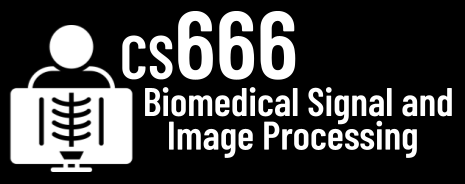

# Assignment 1

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [ ]:
!pip install biosppy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 kB 1.8 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [ ]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

In [ ]:
signal

array([2044., 2044., 2044., ..., 2044., 2045., 2043.])

In [ ]:
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

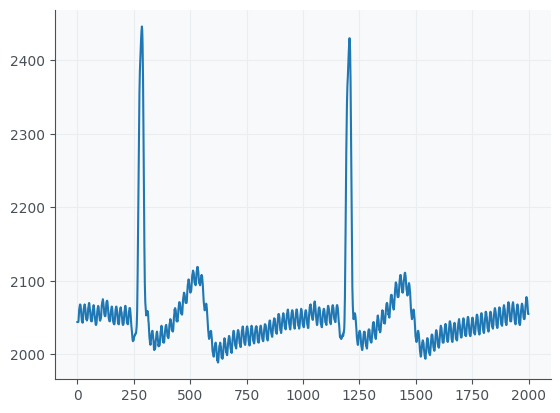

In [ ]:
from matplotlib import pyplot as plt
plt.plot(signal[0:2000])

In [ ]:
Fs = metadata['sampling_rate']
N = len(signal)
Fs

1000.0

In [ ]:
T = (N - 1) / Fs  # duration
T

14.999

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [ ]:
SAMPLING_RATE = 1000 # Sampling rate in Hz, # As provided in the 'ecg.txt' file.
# Samples = 15000. There are 15000 samples in the 'ecg.txt' file.
# SECONDS = Samples/SAMPLING_RATE
# SECONDS = 15000/1000
SECONDS = 15 # Duration of ECG signal

**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [ ]:
from biosppy.signals import ecg

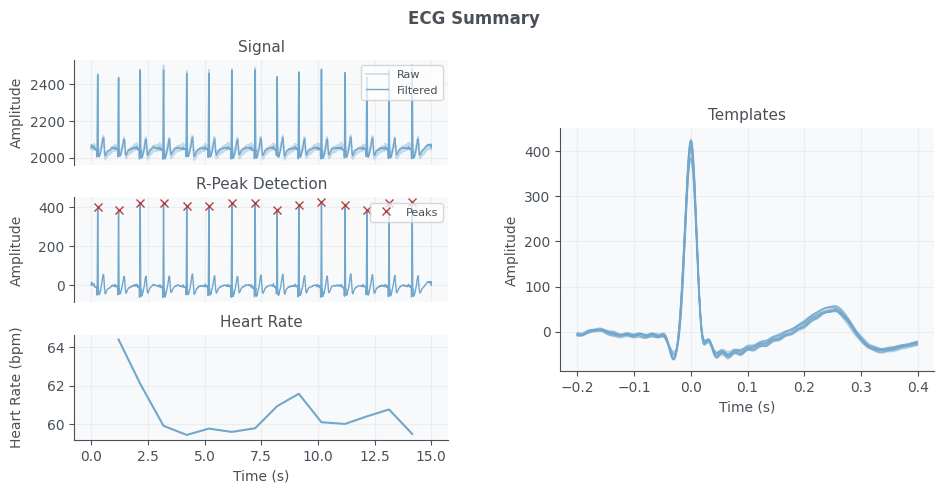

In [ ]:
out = ecg.ecg(signal=signal, sampling_rate=1000., show=True)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

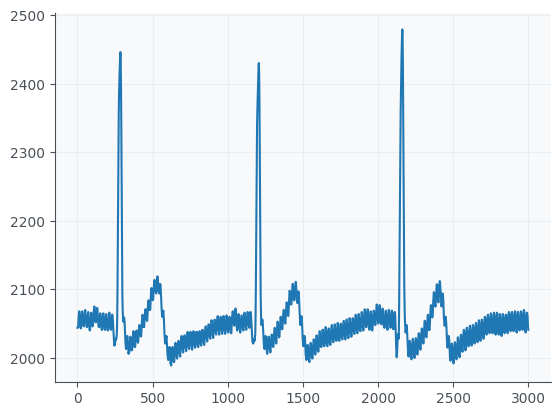

In [ ]:
### TODO plot unfiltered signal

second_to_query = 0
first3_second_unfiltered = signal[second_to_query*SAMPLING_RATE:(second_to_query+3)*SAMPLING_RATE]
plt.plot(first3_second_unfiltered)

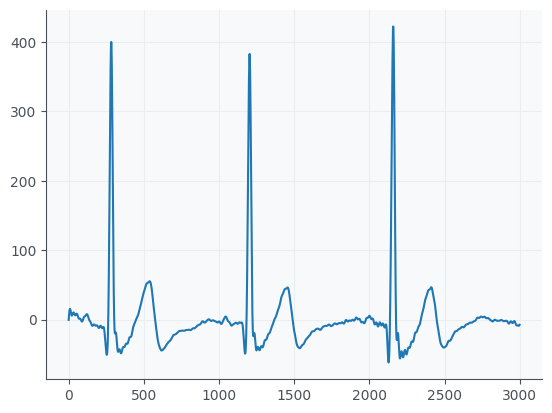

In [ ]:
### TODO plot filtered signal

first3_second_filtered = out[1][second_to_query*SAMPLING_RATE:(second_to_query+3)*SAMPLING_RATE]
plt.plot(first3_second_filtered)

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

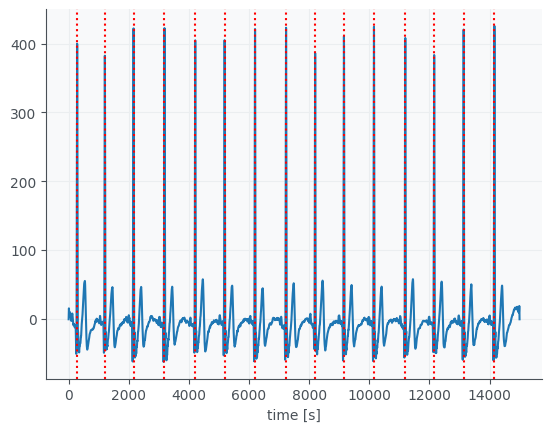

In [ ]:
### TODO

whole_filtered_signal = out[1]
plt.plot(whole_filtered_signal)
plt.xlabel('time [s]')
rpeaks_indices = out[2]
plt.axvline(x = rpeaks_indices[0], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[1], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[2], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[3], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[4], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[5], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[6], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[7], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[8], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[9], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[10], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[11], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[12], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[13], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[14], color = 'r', ls=':')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [ ]:
!pip install neurokit2
import neurokit2 as nk

**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html

import numpy as np
import pandas as pd

In [ ]:
# Hint 2: The plot will have blue, orange, green, and red circles :)

rpeaks=rpeaks_indices
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")

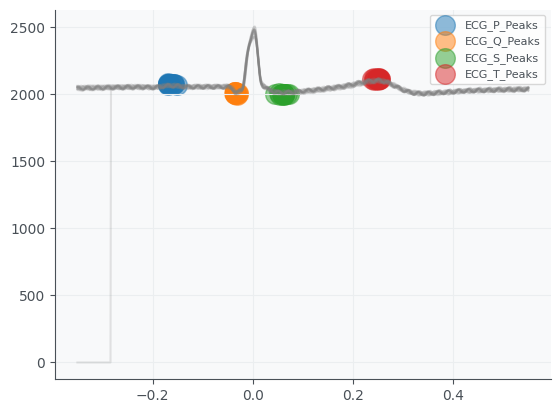

In [ ]:
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

_, waves_peak = nk.ecg_delineate(signal,
                                 rpeaks,
                                 sampling_rate=1000,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

In [ ]:
# TODO Does the detection work well?

#Yes, the detection works well and shows PQST and R peaks.

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [ ]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/

!pip install sleepecg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.0 MB/s eta 0:00:00


In [ ]:
from sleepecg import detect_heartbeats
import numpy as np

In [ ]:
rpeaks_sleepecg = detect_heartbeats(ecg=signal, fs=SAMPLING_RATE)

In [ ]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!

rpeaks_biosppy = np.array(out[2])
rpeaks_sleepecg = np.array(rpeaks_sleepecg)

mse = np.mean((rpeaks_biosppy - rpeaks_sleepecg) ** 2)
print(f"MSE between BioSPPY and sleepecg R-peaks: {mse}")

MSE between BioSPPY and sleepecg R-peaks: 0.2


In [ ]:
# The Mean Square Error(MSE) between the 2 methods that is BioSPPY and sleepecg to calculate R-Peaks is "0.2". This means that both the libraries that were used to calcualte R-Peaks produced identical results and were consistent and reliable for ECG signal processing.

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

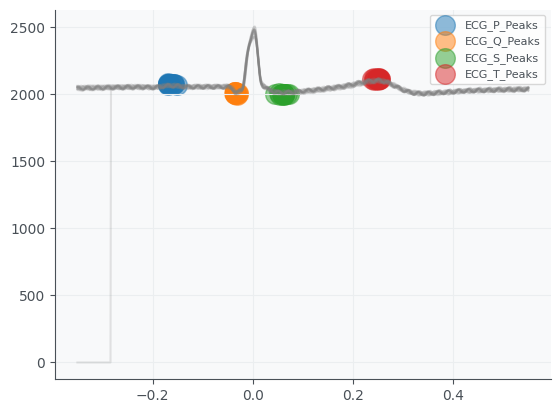

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

_, waves_peak = nk.ecg_delineate(signal,
                                 rpeaks,
                                 sampling_rate=1000,
                                method="peak",
                                show=True,
                                show_type='peaks')

In [ ]:
rpeaks

array([  283,  1204,  2159,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10156, 11198, 12159, 13139, 14162])

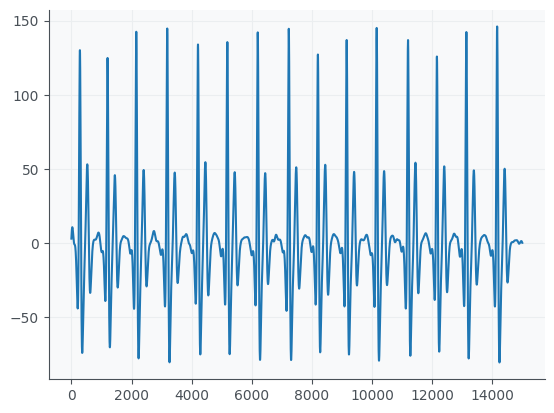

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.

cleaned = nk.signal_filter(signal,
                               sampling_rate=1000,
                               lowcut=2,
                               highcut=9,
                               method='butterworth')
plt.plot(cleaned)

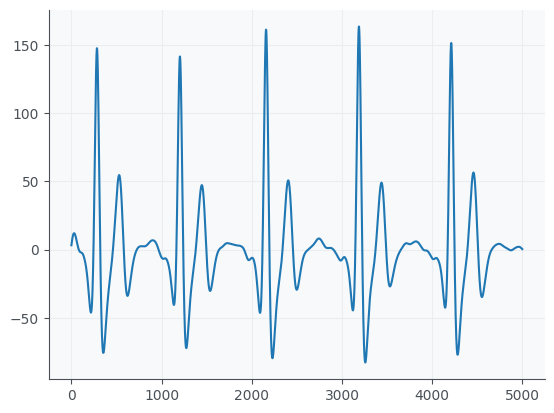

In [ ]:
#first 5 seconds after filtering

first5_second_unfiltered = signal[0:(second_to_query+5)*SAMPLING_RATE]
first5_second_cleaned=nk.signal_filter(first5_second_unfiltered,
                               sampling_rate=1000,
                               lowcut=2,
                               highcut=10,
                               method='butterworth')
plt.plot(first5_second_cleaned)

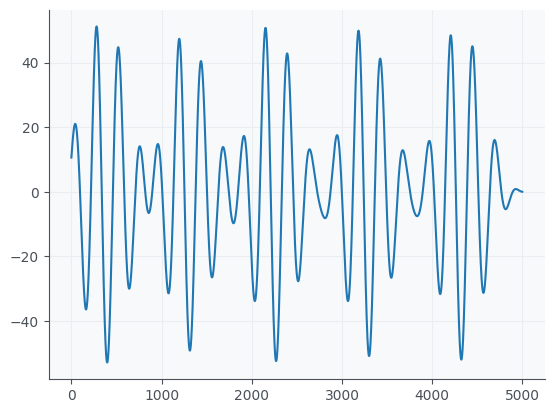

In [ ]:
first5_second_cleaned=nk.signal_filter(first5_second_unfiltered,
                               sampling_rate=1000,
                               lowcut=3,
                               highcut=5,
                               method='butterworth')
plt.plot(first5_second_cleaned)

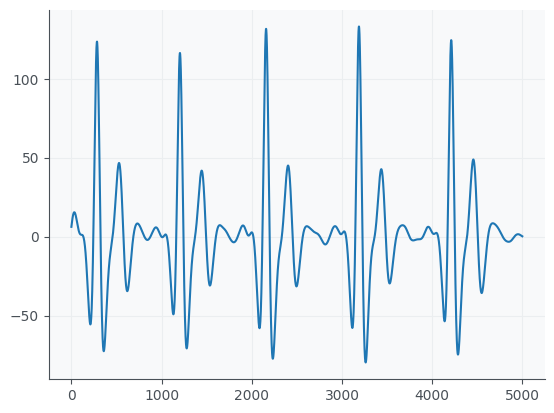

In [ ]:
first5_second_cleaned=nk.signal_filter(first5_second_unfiltered,
                               sampling_rate=1000,
                               lowcut=3,
                               highcut=9,
                               method='butterworth')
plt.plot(first5_second_cleaned)

In [ ]:
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)

# lowcut=3, highcut=9 works better

# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

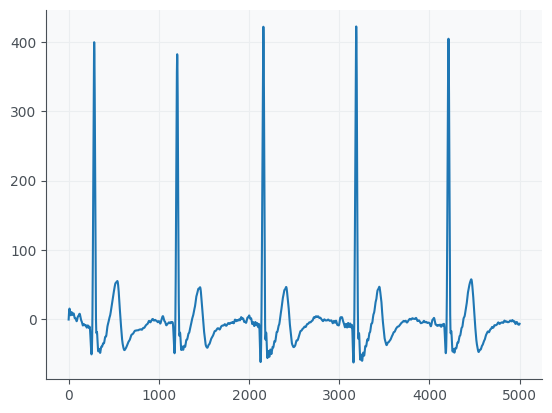

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

plt.plot(out[1][0:(second_to_query+5)*SAMPLING_RATE])

In [ ]:
# TODO Which one works the best?

# I think both the NeuroKit2 and BioSPPY library work effectively and show consistent results.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#